#  Load the necessary libraries.

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from sklearn.preprocessing import LabelEncoder
import copy

# 1. Import the dataset and Load the dataset.

In [2]:
df=pd.read_excel('Wholesale customers data.xlsx',sheet_name='Wholesale customers data')

In [3]:
df.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
df.shape

(440, 9)

In [6]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [7]:
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


# 1.1. Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [8]:
channel=df.groupby('Channel')
channel.sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


The channel "Hotel" seems to spend more.
The channel "Retail" seems to comparatively spend less

In [17]:
region= df.groupby('Region')
region.sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


The Region "Other" seems to spend more.
The Region "Oporto" seems to spend less.

# 1.2. There are 6 different varieties of items are considered.
# Do all varieties show similar behaviour across Region and Channel?

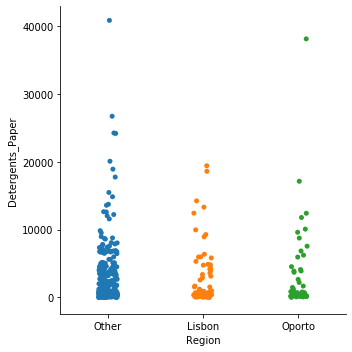

In [15]:
sns.catplot(x="Region", y="Detergents_Paper",data=df)

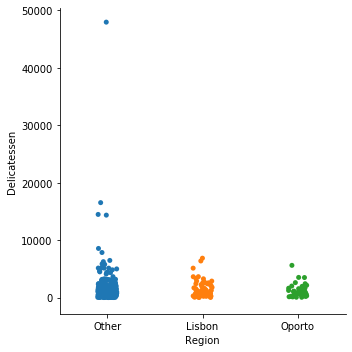

In [14]:
sns.catplot(x="Region", y="Delicatessen",data=df)

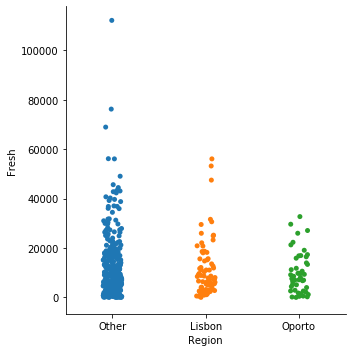

In [46]:
sns.catplot(x="Region", y="Fresh",data=df)

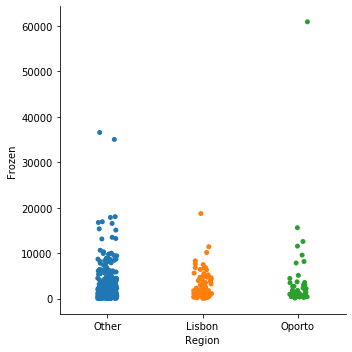

In [47]:
sns.catplot(x="Region", y="Frozen",data=df)

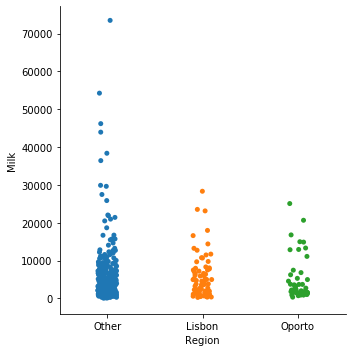

In [48]:
sns.catplot(x="Region", y="Milk",data=df)

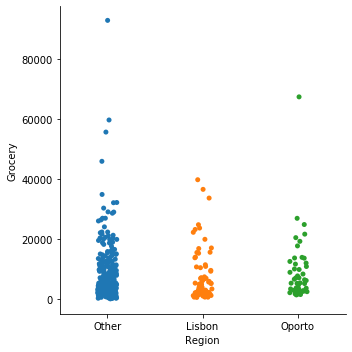

In [49]:
sns.catplot(x="Region", y="Grocery",data=df)

Overall, we see that there is a similar pattern among the different varieties with the Region.

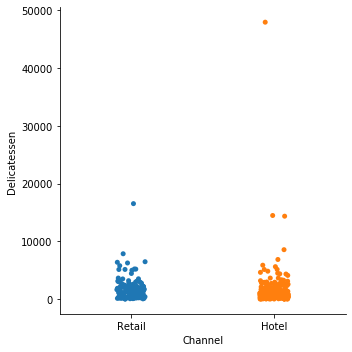

In [51]:
sns.catplot(x="Channel", y="Delicatessen",data=df)

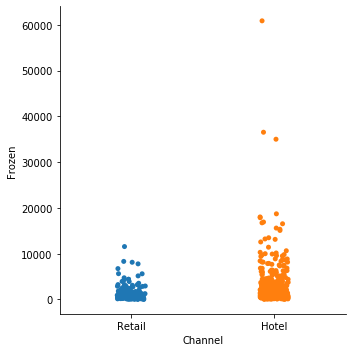

In [52]:
sns.catplot(x="Channel", y="Frozen",data=df)

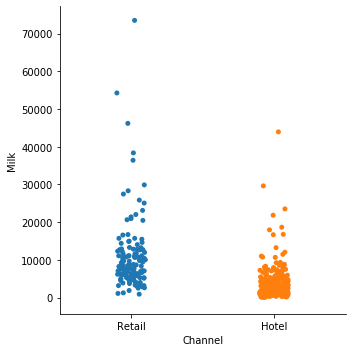

In [53]:
sns.catplot(x="Channel", y="Milk",data=df)

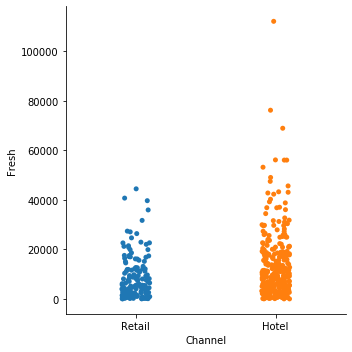

In [54]:
sns.catplot(x="Channel", y="Fresh",data=df)

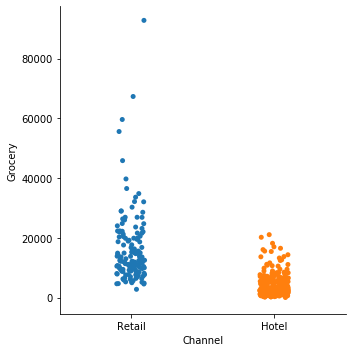

In [55]:
sns.catplot(x="Channel", y="Grocery",data=df)

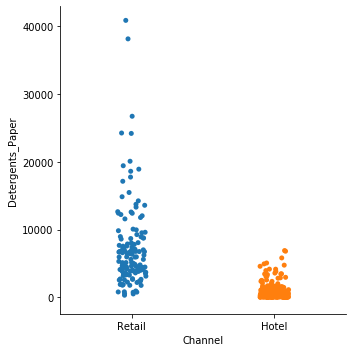

In [16]:
sns.catplot(x="Channel", y="Detergents_Paper",data=df)

There is a slight variation among the different varieties among the channels "Retail and Hotel".

# 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

The inconsistency of an item can be shown through the coefficient of variation.
The higher the coefficient of variation, more the inconsistency of the item and vice versa.

In [38]:
cov_Detergents_Paper=(df.Detergents_Paper.std()/df.Detergents_Paper.mean())*100
cov_Detergents_Paper

165.46471385005154

In [39]:
cov_Delicatessen=(df.Delicatessen.std()/df.Delicatessen.mean())*100
cov_Delicatessen

184.94068981158384

In [33]:
cov_fresh=(df.Fresh.std()/df.Fresh.mean())*100
cov_fresh

105.39179237473148

In [35]:
cov_frozen=(df.Frozen.std()/df.Frozen.mean())*100
cov_frozen

158.03323836352914

In [36]:
cov_milk=(df.Milk.std()/df.Milk.mean())*100
cov_milk

127.32985840065413

In [37]:
cov_grocery=(df.Grocery.std()/df.Grocery.mean())*100
cov_grocery

119.51743730016824

Based on the above results, the item Fresh shows the least inconsistent behaviour and the item Delicatessen shows the most inconsistent behaviour

# 1.4. Are there any outliers in the data?

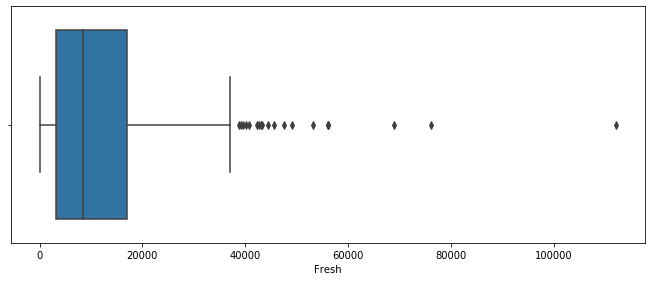

In [27]:
plt.figure(figsize= (25,20))
plt.subplot(4,2,2)
sns.boxplot(df.Fresh)

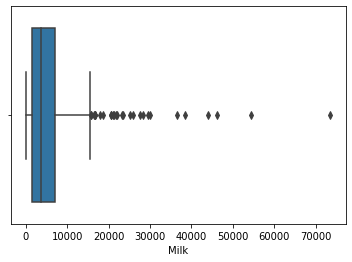

In [14]:
sns.boxplot(df.Milk)

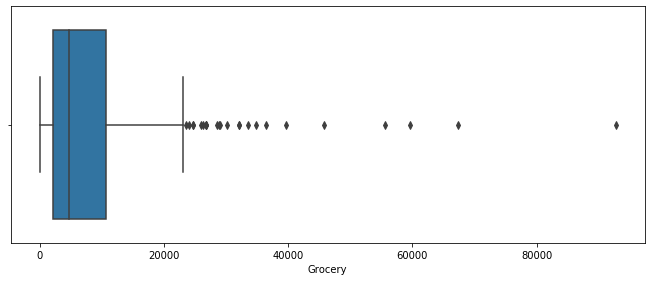

In [24]:
plt.figure(figsize= (25,20))
plt.subplot(4,2,2)
sns.boxplot(df.Grocery)

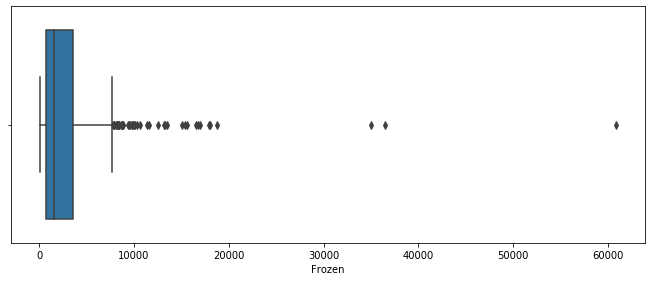

In [26]:
plt.figure(figsize= (25,20))
plt.subplot(4,2,2)
sns.boxplot(df.Frozen)

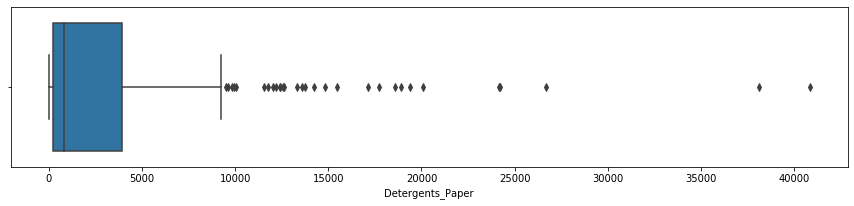

In [20]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(df.Detergents_Paper)

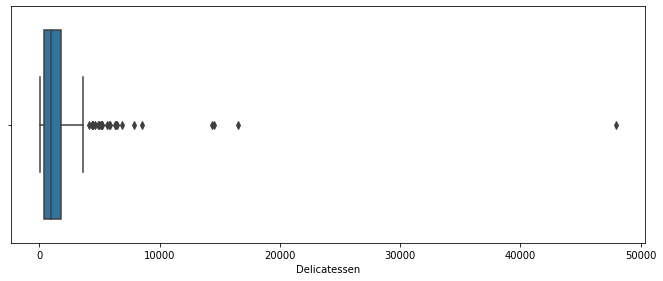

In [25]:
plt.figure(figsize= (25,20))
plt.subplot(4,2,2)
sns.boxplot(df.Delicatessen)

Seeing the plots above, it is very evident that there are a lot of outliers in the data.

# 1.5. On the basis of this report, what are the recommendations?

On analysing the dataset, the first thing that comes to our attention is that there are a lot of outliers.

The Hotel channel has a higher spending pattern when compared to Retail.

In the Region area, we see that "Other" region seems to have a higher spending pattern, whereas the least is in the region "Oporto".

In terms of consistency of the products, I believe "Fresh" seems to be more consistent in comparison to the other products, whereas "Delicatessen" seems to be the most inconsistent product among all.

Overall, I believe that if there were a lesser outliers in the data, the analysis of the dataset can be much more accurate.

# 2. Import the dataset and Load the dataset.

In [22]:
survey = pd.read_csv('Survey.csv')

In [23]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

# 2.1.1. Gender and Major

In [43]:
data_crosstab = pd.crosstab(survey['Gender'],survey['Major']) 
data_crosstab

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


# 2.1.2. Gender and Grad Intention

In [44]:
data_crosstab = pd.crosstab(survey['Gender'],survey['Grad Intention']) 
data_crosstab

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


# 2.1.3. Gender and Employment

In [45]:
data_crosstab = pd.crosstab(survey['Gender'],survey['Employment']) 
data_crosstab

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


# 2.1.4. Gender and Computer

In [46]:
data_crosstab = pd.crosstab(survey['Gender'],survey['Computer']) 
data_crosstab

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?
# What is the probability that a randomly selected CMSU student will be female?

In [24]:
male= survey['Gender']== 'Male'
Male= male.sum()
Male

29

In [25]:
total=survey['Gender'].count()
total

62

In [121]:
prob_male=round(Male/total,4)*100

print('Probability that a randomly selected student is male is %1.1f' % prob_male +'%')

Probability that a randomly selected student is male is 46.8%


In [26]:
female= survey['Gender']== 'Female'
Female= female.sum()
Female

33

In [84]:
prob_female=round(Female/total,4)*100

print('Probability that a randomly selected student is female is %1.1f' % prob_female +'%')

Probability that a randomly selected student is female is 53.2%


# 2.2.2. Find the conditional probability of different majors among the male students in CMSU.
# Find the conditional probability of different majors among the female students of CMSU.

There are 7 different majors, Hence I am showing a total of 14 possible combination for male and female students

From the contingency table, I have simplified my answers as below:

In [30]:
male_acc = 4
female_acc = 3

In [32]:
prob_female_acc=round(female_acc/Female,4)*100
print('Probability that a female student chose Accounting is %1.1f' % prob_female_acc +'%')

Probability that a female student chose Accounting is 9.1%


In [33]:
prob_male_acc=round(male_acc/Male,4)*100
print('Probability that a male student chose Accounting is %1.1f' % prob_male_acc +'%')

Probability that a male student chose Accounting is 13.8%


In [35]:
male_CIS = 1
female_CIS = 3

In [38]:
prob_female_CIS=round(female_CIS/Female,4)*100
print('Probability that a female student chose CIS is %1.1f' % prob_female_CIS +'%')

Probability that a female student chose CIS is 9.1%


In [37]:
prob_male_CIS=round(male_CIS/Male,4)*100
print('Probability that a male student chose CIS is %1.1f' % prob_male_CIS +'%')

Probability that a male student chose CIS is 3.5%


In [39]:
male_eco = 4
female_eco = 7

In [47]:
prob_female_eco=round(female_eco/Female,4)*100
print('Probability that a female student chose Economics/Finance is %1.1f' % prob_female_eco +'%')

Probability that a female student chose Economics/Finance is 21.2%


In [46]:
prob_male_eco=round(male_eco/Male,4)*100
print('Probability that a male student chose Economics/Finance is %1.1f' % prob_male_eco +'%')

Probability that a male student chose Economics/Finance is 13.8%


In [42]:
male_ib = 2
female_ib = 4

In [122]:
prob_female_ib=round(female_ib/Female,4)*100
print('Probability that a female student chose International Business is %1.1f' % prob_female_ib +'%')

Probability that a female student chose International Business is 12.1%


In [49]:
prob_male_ib=round(male_ib/Male,4)*100
print('Probability that a male student chose International Business is %1.1f' % prob_male_ib +'%')

Probability that a male student chose International Business is 6.9%


In [50]:
male_man = 6
female_man = 4

In [51]:
prob_female_man=round(female_man/Female,4)*100
print('Probability that a female student chose Management is %1.1f' % prob_female_man +'%')

Probability that a female student chose Management is 12.1%


In [54]:
prob_male_man=round(male_man/Male,4)*100
print('Probability that a female student chose Management is %1.1f' % prob_male_man +'%')

Probability that a female student chose Management is 20.7%


In [116]:
male_other = 4
female_other = 3

In [117]:
prob_female_other=round(female_man/Female,4)*100
print('Probability that a female student chose Other is %1.1f' % prob_female_other +'%')

Probability that a female student chose Other is 12.1%


In [118]:
prob_male_other=round(male_other/Male,4)*100
print('Probability that a female student chose Other is %1.1f' % prob_male_other +'%')

Probability that a female student chose Other is 13.8%


In [119]:
male_ret = 5
female_ret = 9

In [120]:
prob_female_ret=round(female_ret/Female,4)*100
print('Probability that a female student chose Retail/Marketing is %1.1f' % prob_female_ret +'%')

Probability that a female student chose Retail/Marketing is 27.3%


In [57]:
prob_male_ret=round(male_ret/Male,4)*100
print('Probability that a female student chose Retail/Marketing is %1.1f' % prob_male_ret +'%')

Probability that a female student chose Retail/Marketing is 17.2%


# 2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
# Find the conditional probability of intent to graduate, given that the student is a female.

Here, there are outcome: No, Yes, Undecided. Based on this, we have 3 combinations each for Male and Female

In [60]:
male_no = 3
female_no = 9

In [61]:
prob_female_no=round(female_no/Female,4)*100
print('Probability that a female student has no intention to graduate is %1.1f' % prob_female_no +'%')

Probability that a female student has no intention to graduate is 27.3%


In [62]:
prob_male_no=round(male_no/Male,4)*100
print('Probability that a male student has no intention to graduate is %1.1f' % prob_male_no +'%')

Probability that a male student has no intention to graduate is 10.3%


In [63]:
male_yes = 17
female_yes = 11

In [65]:
prob_female_yes=round(female_yes/Female,4)*100
print('Probability that a female student has the intention to graduate is %1.1f' % prob_female_yes +'%')

Probability that a female student has the intention to graduate is 33.3%


In [64]:
prob_male_yes=round(male_yes/Male,4)*100
print('Probability that a male student has the intention to graduate is %1.1f' % prob_male_yes +'%')

Probability that a male student has the intention to graduate is 58.6%


In [66]:
male_un = 9
female_un = 13

In [67]:
prob_female_un=round(female_un/Female,4)*100
print('Probability that a female student has not decided to graduate is %1.1f' % prob_female_un +'%')

Probability that a female student has not decided to graduate is 39.4%


In [68]:
prob_male_un=round(male_un/Male,4)*100
print('Probability that a male student has not decided to graduate is %1.1f' % prob_male_un +'%')

Probability that a male student has not decided to graduate is 31.0%


# 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [69]:
male_full = 3
female_full = 9

In [153]:
prob_female_full=round(female_full/Female,4)*100
print('Probability that a female student is employed Full time is %1.1f' % prob_female_full +'%')

Probability that a female student is employed Full time is 27.3%


In [154]:
prob_male_full=round(male_full/Male,4)*100
print('Probability that a male student is employed Full time is %1.1f' % prob_male_full +'%')

Probability that a male student is employed Full time is 10.3%


In [74]:
male_part = 19
female_part = 24

In [149]:
prob_female_part=round(female_part/Female,4)*100
print('Probability that a female student is employed part time is %1.1f' % prob_female_part +'%')

Probability that a female student is employed part time is 72.7%


In [150]:
prob_male_part=round(male_part/Male,4)*100
print('Probability that a male student is employed part time is %1.1f' % prob_male_part +'%')

Probability that a male student is employed part time is 65.5%


In [77]:
male_unem = 3
female_unem = 6

In [155]:
prob_female_unem=round(female_unem/Female,4)*100
print('Probability that a female student is unemployed is %1.1f' % prob_female_unem +'%')

Probability that a female student is unemployed is 18.2%


In [152]:
prob_male_unem=round(male_unem/Male,4)*100
print('Probability that a male student is unemployed is %1.1f' % prob_male_unem +'%')

Probability that a male student is unemployed is 10.3%


# 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [80]:
male_lap = 26
female_lap = 29

In [83]:
prob_female_lap=round(female_lap/Female,4)*100
print('Probability that a female student has a preference for laptop is %1.1f' % prob_female_lap +'%')

Probability that a female student has a preference for laptop is 87.9%


In [82]:
prob_male_lap=round(male_lap/Male,4)*100
print('Probability that a male student has a preference for laptop is %1.1f' % prob_male_lap +'%')

Probability that a male student has a preference for laptop is 89.7%


# 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender? Justify your comment in each case.

In the case of Major, I believe choice of chosing them is dependent of the Gender. In Accounting,Management and other, the proportion of Male students is higher when compared to female.
In CIS,Economics/Finance,Internation Business and Retail Marketing, the female students have an upper hand in comparison to Male.

When we the see students to intention to graduate, Male students have a higher intention to graduate when compared to female students.

The employment rate seems to be higher among the female students, be it full time or part time, when compared to the male students

I believe the usage of laptops is almost proportion,among the female and male students. Hence there usage of Laptop is independent of the Gender. 

# 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
# Write a note summarizing your conclusions.

The test of Normality is explained through the shapiro test.

Here, the significance level is taken as 0.05

# Salary

Null Hypothesis is that the variable Salary follows a normal distribution.

Alternate Hypothesis is that the variable Salary does not follows a normal distribution

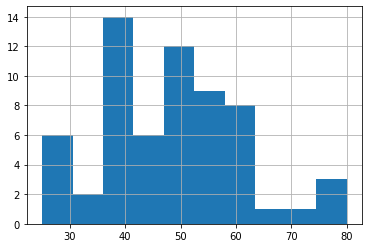

In [93]:
survey['Salary'].hist()

In [85]:
stat , p_value = stats.shapiro(survey.Salary)
stat , p_value

(0.9565856456756592, 0.028000956401228905)

From the above p value, we can reject the Null hypothesis, since the value of P, 0.028, is less than the significance level, 0.05

# Spending

Null Hypothesis is that the variable Spending follows a normal distribution.

Alternate Hypothesis is that the variable Spending does not follows a normal distribution

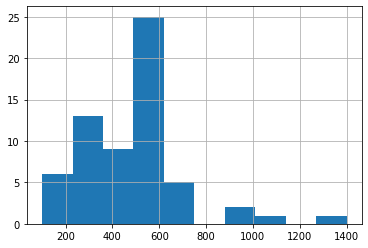

In [94]:
survey['Spending'].hist()

In [89]:
stat , p_value = stats.shapiro(survey.Spending)
stat , p_value

(0.8777452111244202, 1.6854661225806922e-05)

From the above p value, we can reject the Null hypothesis, since the value of P, 1.685 e-05, is less than the significance level, 0.05

# Text Messages

Null Hypothesis is that the variable Text Messages follows a normal distribution.

Alternate Hypothesis is that the variable Text messages does not follows a normal distribution

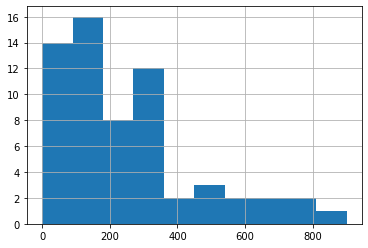

In [95]:
survey['Text Messages'].hist()

In [87]:
stat , p_value = stats.shapiro(survey['Text Messages'])
stat , p_value

(0.8594191074371338, 4.324040673964191e-06)

From the above p value, we can reject the Null hypothesis, since the value of P, 4.324 e-06, is less than the significance level, 0.05

There is a slight skewness in the variables "Spending and Text Messages".
Though the graphical representation of the variable "Salary" seems to be slighty normally distributed. However at the 95% significance, they are not normally distributed. 
Overall, we see that the distribution for the categorical variables, do not seem to be normal.

# 3. Import the dataset and Load the dataset.

In [96]:
shinA = pd.read_csv('A & B Shingles.csv')

In [102]:
shinB = pd.read_csv('B Shingle.csv')

In [98]:
shinA.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [103]:
shinB.head()

,B
0,0.14
1,0.15
2,0.31
3,0.16
4,0.37


In [156]:
shinA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [157]:
shinB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
B    31 non-null float64
dtypes: float64(1)
memory usage: 376.0 bytes


# 3.1. For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

Null Hypothesis = Mean moisture content is greater than or equal to 0.35 pound per 100 square feet.

Alternate Hypothesis = Mean moisture content is less than 0.35 pound per 100 square feet

# 3.2. For the A shingles, conduct the test of hypothesis and find the p-value.
# Interpret the p-value.
# Is there evidence at the 0.05 level of significance that the population mean moisture content is less than 0.35 pound per 100 square feet?

In [127]:
t,p_value = stats.ttest_1samp(shinA['A'],0.35)
t,p_value

(-1.4735046253382782, 0.14955266289815025)

Since this is a one tailed test, we divide the p value by 2

In [128]:
p = p_value/2
p

0.07477633144907513

Here, the p value is greater than the significance level of 0.05.
Hence we fail to reject the Null Hypothesis.
So, we do not have enough evidence to prove that the population mean moisture content is less than 0.35 pound per 100 square feet

# 3.3. For the B shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

Null Hypothesis = Mean moisture content is greater than or equal to 0.35 pound per 100 square feet.

Alternate Hypothesis = Mean moisture content is less than 0.35 pound per 100 square feet

# 3.4. For the B shingles, conduct the test of the hypothesis and find the p-value.
# Interpret the p-value.
# Is there evidence at the 0.05 level of significance that the population mean moisture content is less than 0.35 pound per 100 square feet?

In [129]:
t,p_value = stats.ttest_1samp(shinB['B'],0.35)
t,p_value

(-3.1003313069986995, 0.004180954800638363)

Since this is a one tailed test, we divide the p value by 2

In [131]:
p = p_value/2
p

0.0020904774003191813

Here, the p value is lesser than the significance level of 0.05.
Hence we reject the Null Hypothesis.
So, we have enough evidence to prove that the population mean moisture content is less than 0.35 pound per 100 square feet

# 3.5. Do you think that the population means for shingles A and B are equal?
# Form the hypothesis and conduct the test of the hypothesis.
# What assumption do you need to check before the test for equality of means is performed?

Null hypothesis = Mean of Shignle A is equal to Mean of Shingle B.

Alternate hypothesis = Mean of Shignle A is not equal to Mean of Shingle B.

The level of significance is 0.05

In [133]:
t, p = ttest_ind(shinA['A'], shinB['B'])
t,p

(1.289628271966112, 0.2017496571835328)

Here the p value is 0.201.

Since the p value, 0.201, is greater than the significance level, 0.05, we conclude that the population means of the shingles A and B are equal.

The assumptions for the test of equality are as follows:
    1. The population variance of the samples are equal
    2. The population has a normal ditribution
    3. Each value is sampled independently.

# 3.6. What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

The most important assumption I can say for conducting the hypothesis testing is the population distribution which needs to be normal.

# 3.7. Check the assumptions made with histograms, boxplots, normal probability plots or empirical rule.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026283C50948>,
      dtype=object)

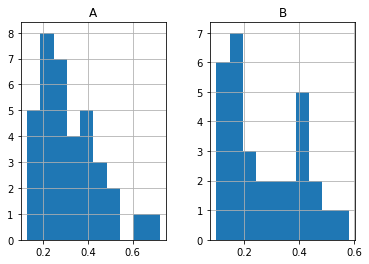

In [140]:
shinA.hist()

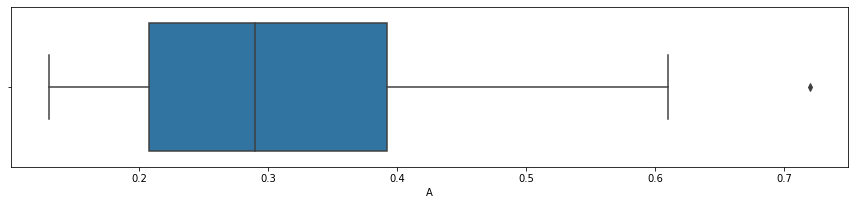

In [137]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(shinA.A)

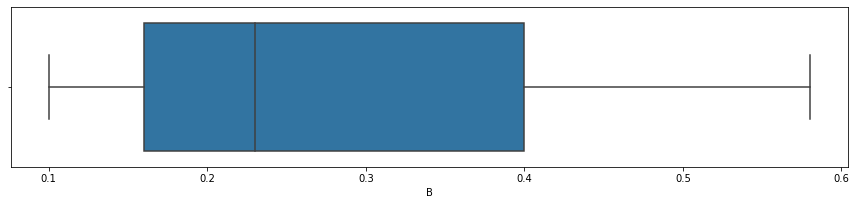

In [138]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(shinA.B)

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([0.13, 0.14, 0.15, 0.16, 0.16, 0.2 , 0.2 , 0.2 , 0.2 , 0.21, 0.22,
         0.24, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.29, 0.3 , 0.33, 0.34,
         0.34, 0.36, 0.37, 0.39, 0.39, 0.4 , 0.42, 0.43, 0.44, 0.47, 0.49,
         0.51, 0.61, 0.72])),
 (0.1358818893075276, 0.31666666666666665, 0.9680451073387029))

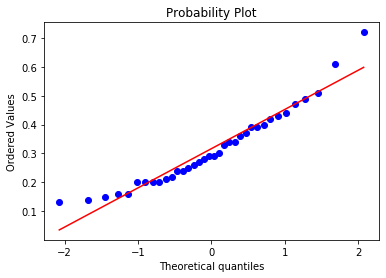

In [146]:
A_norm= stats.probplot(shinA.A,plot=plt)
A_norm

((array([-2.01197163, -1.6105163 , -1.36883603, -1.1880445 , -1.03948072,
         -0.91090285, -0.79586259, -0.69050407, -0.59231064, -0.49952733,
         -0.41086261, -0.32532036, -0.24209833, -0.16052274, -0.08000327,
          0.        ,  0.08000327,  0.16052274,  0.24209833,  0.32532036,
          0.41086261,  0.49952733,  0.59231064,  0.69050407,  0.79586259,
          0.91090285,  1.03948072,  1.1880445 ,  1.36883603,  1.6105163 ,
          2.01197163]),
  array([0.1 , 0.11, 0.11, 0.11, 0.13, 0.14, 0.15, 0.16, 0.16, 0.17, 0.18,
         0.18, 0.19, 0.22, 0.22, 0.23, 0.25, 0.26, 0.31, 0.31, 0.36, 0.37,
         0.39, 0.41, 0.42, 0.43, 0.43, 0.44, 0.44, 0.52, 0.58])),
 (0.13740916416039078, 0.2735483870967742, 0.9638824395157428))

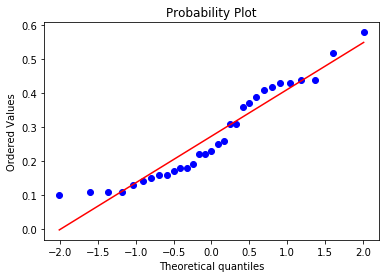

In [148]:
B_norm= stats.probplot(shinB.B,plot=plt)
B_norm

# 3.8. Do you think that the assumption needed in order to conduct the hypothesis tests above is valid? Explain.

The main assumption for conducting a hypothesis testing is basically that the population distribution is normal.

From the above probability plot, we can say that to an extent, the distribution of the samples of A and B shingles are normal.

The criteria of a miminum sample size of 30 is also met.
However I believe that if the sample size is increased, we can provide accurate results.

In total, the assumptions assumed seem to be valid enough to conduct the hypothesis tests.